In [2]:
### Import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# Import data
file_path = "/home/fe528610/Documents/Final_Project/pd_speech_features.csv"
data = pd.read_csv(file_path, header=1)

# Display the first few rows to verify
print(data.head())

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

In [5]:
# # Define the repeating sequence
# sequence = [1, 2, 3]

# # Create the new column with the sequence repeated
# data['Time'] = [sequence[i % len(sequence)] for i in range(len(data))]

In [6]:
aggregated_data = data.groupby("Time").mean().reset_index()

KeyError: 'Time'

In [7]:
# Reshape data for slope graph
slope_data = data.pivot(index='id', columns='Time', values='PPE')

# Plot slope graph
plt.figure(figsize=(8, 5))
for row in slope_data.itertuples():
    plt.plot([1, 2, 3], row[1:], marker='o', alpha=0.6)

plt.title("Slope Graph of Individual Changes Over Time")
plt.xlabel("Time")
plt.xticks([1, 2, 3], ['Time 1', 'Time 2', 'Time 3'])
plt.ylabel("Value")
plt.show()


KeyError: 'Time'

In [8]:
# box plot grouped by year
sns.boxplot(data=data, x="Time", y="DFA")
plt.show()


ValueError: Could not interpret value `Time` for `x`. An entry with this name does not appear in `data`.

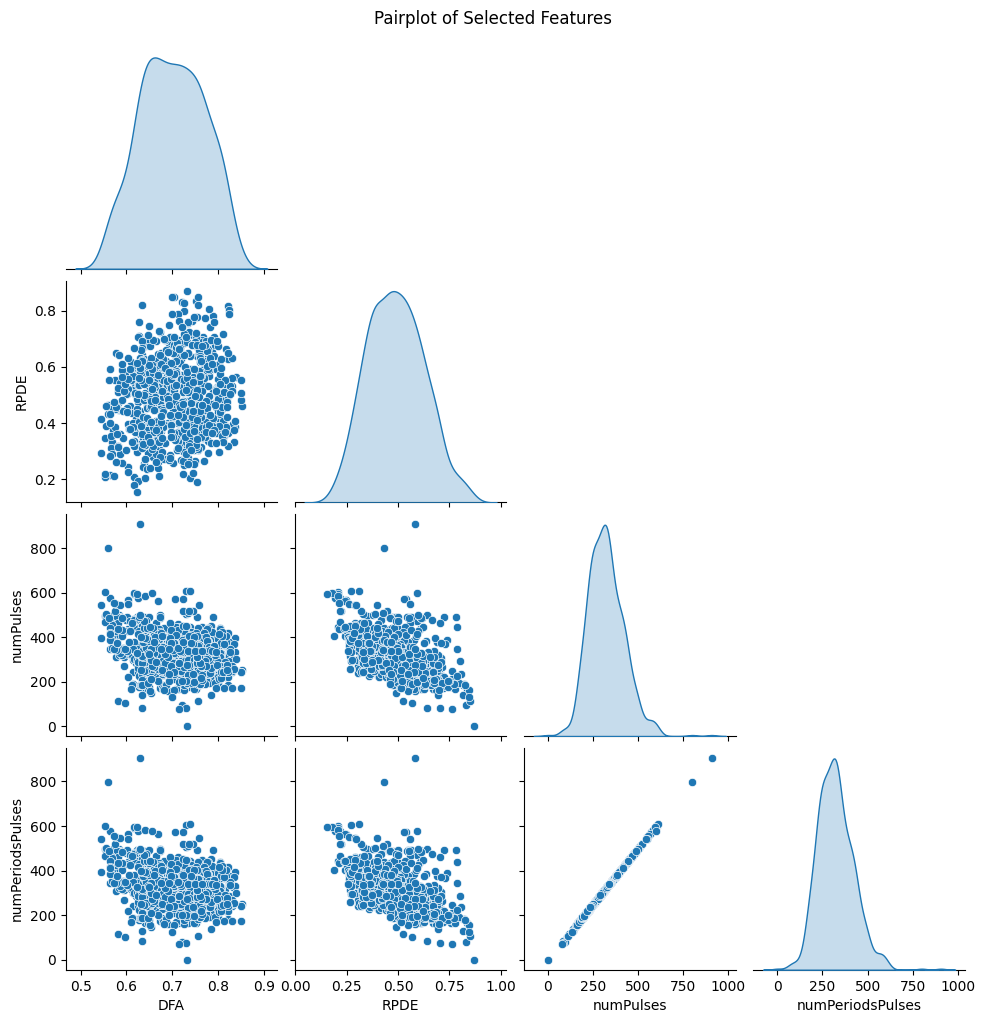

In [4]:
# Create pairplot
baseline_features = data.iloc[:,3:7]
sns.pairplot(baseline_features, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Data Exploration

In [5]:
# Check for missing values
data.isnull().sum()


id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [6]:
# Summary Statistics
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


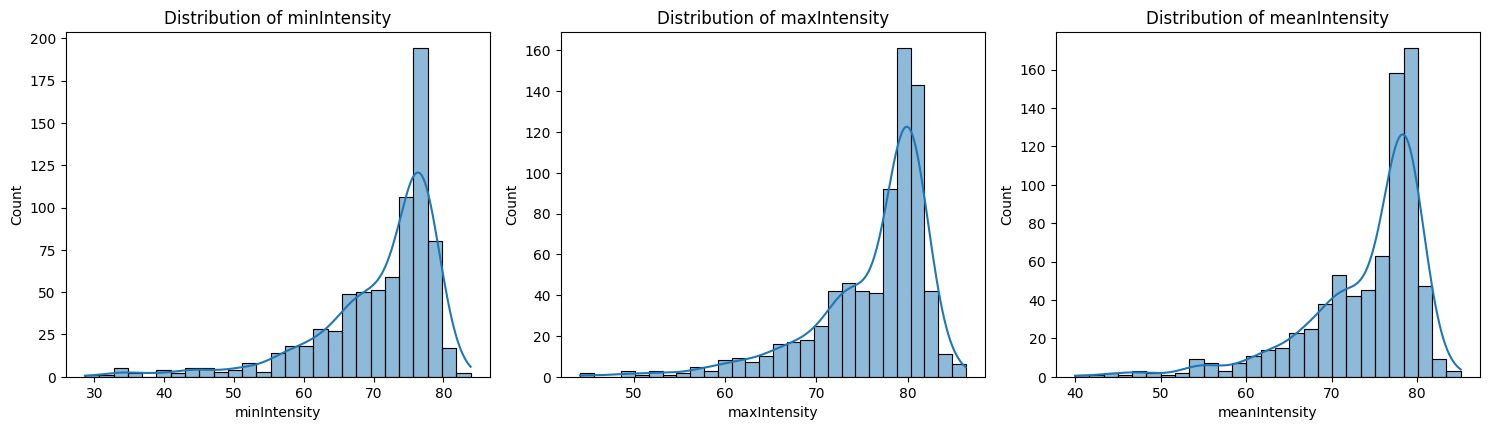

In [7]:
###Select the first 5 features
first_5_features = data.iloc[:, 23:26]

# Plot distributions
plt.figure(figsize=(15, 8))
for i, col in enumerate(first_5_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(first_5_features[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

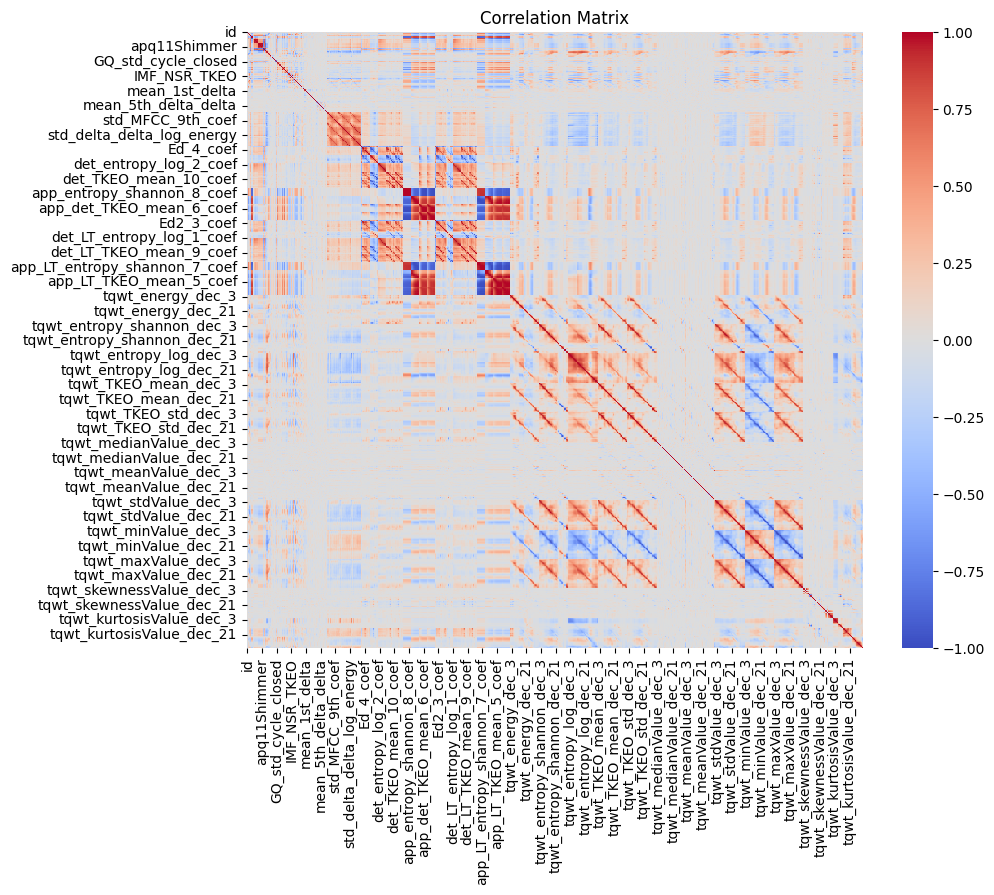

Highly Correlated Variable Pairs:
Series([], dtype: float64)


In [8]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap for the top correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix")
plt.show()

# Get pairs of highly correlated variables
high_corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().sort_values(ascending=False)
print("Highly Correlated Variable Pairs:")
print(high_corr_pairs[high_corr_pairs ==1])  # Adjust threshold as needed

In [9]:
# Check distribution of class
data['class'].value_counts(normalize=True)*100

class
1    74.603175
0    25.396825
Name: proportion, dtype: float64



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



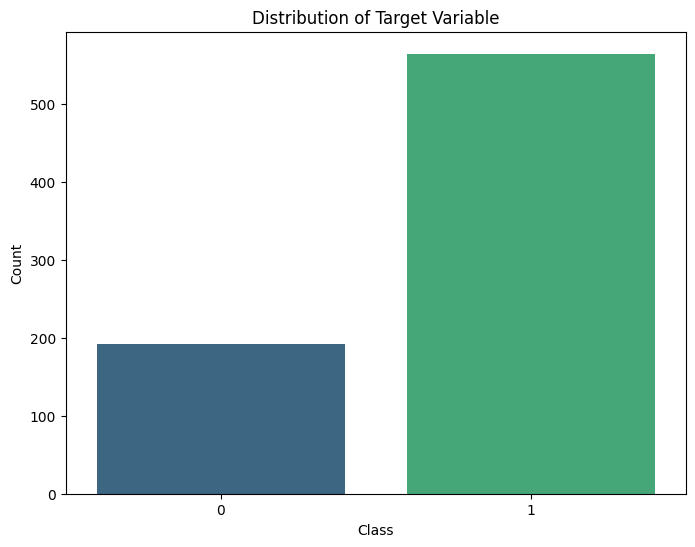

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data, palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [11]:
### Data Splitting
X = data.iloc[:, 2:754]
y = data.iloc[:, 754]
from sklearn.model_selection import train_test_split
# Split t data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from imblearn.over_sampling import SMOTE
##  Initialize SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Fit and apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape , y_train_resampled.shape

((900, 752), (900,))

In [13]:
## Scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = data.iloc[:, 2:754]
y = data.iloc[:, 754]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the resampled training data
X_train_resampled = scaler.fit_transform(X_train_resampled)

# Scale the test data using the same scaler
X_test = scaler.transform(X_test)


# Develop Full Model 

### Logistic Regression 

In [15]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=5000, random_state=42)  # Added random_state for reproducibility
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8553
Mean Squared Error (MSE): 0.1447

Confusion Matrix:
[[ 25  13]
 [  9 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.69        38
           1       0.89      0.92      0.91       114

    accuracy                           0.86       152
   macro avg       0.81      0.79      0.80       152
weighted avg       0.85      0.86      0.85       152



### KNN 

In [16]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define a parameter grid to search over values of K
param_grid = {'n_neighbors': range(1, 31)}  # Trying K values from 1 to 30

# Use GridSearchCV to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)  # 10-fold cross-validation, n_jobs=-1 to use all processors
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"The best K value is: {best_k}")
print(f"Cross-validated accuracy with K={best_k}: {best_score:.4f}")

# Train KNN with the best K value on the training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_red = best_knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_red)
conf_matrix = confusion_matrix(y_test, y_pred_red)
class_report = classification_report(y_test, y_pred_red)
mse = mean_squared_error(y_test, y_pred_red)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


The best K value is: 1
Cross-validated accuracy with K=1: 0.9278
Accuracy: 0.8750
Mean Squared Error (MSE): 0.1250

Confusion Matrix:
[[34  4]
 [15 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        38
           1       0.96      0.87      0.91       114

    accuracy                           0.88       152
   macro avg       0.83      0.88      0.85       152
weighted avg       0.89      0.88      0.88       152



### Gaussian Naive Bayes

In [17]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7500
Mean Squared Error (MSE): 0.2500

Confusion Matrix:
[[24 14]
 [24 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        38
           1       0.87      0.79      0.83       114

    accuracy                           0.75       152
   macro avg       0.68      0.71      0.69       152
weighted avg       0.77      0.75      0.76       152



### XgBoost

In [18]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


[19:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Accuracy: 0.8882

Confusion Matrix:
[[ 26  12]
 [  5 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        38
           1       0.90      0.96      0.93       114

    accuracy                           0.89       152
   macro avg       0.87      0.82      0.84       152
weighted avg       0.89      0.89      0.88       152



# Feature Selection Methods

### Feature selection Using Regularized Logistic Regression 

In [19]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
import time

# Start the timer
start_time = time.time()

# Create a logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'penalty': ['l1', 'l2']  # L1 is Lasso, L2 is Ridge
}

# Stratified K-Fold Cross Validation with 10 splits
skf = StratifiedKFold(n_splits=10)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Stop the timer
end_time = time.time()

# Get the best hyperparameters and model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and performance
print(f"Best Hyperparameters: {best_params}")
print(f"Best F1 Score: {best_score:.4f}")
print(f"Best Model: {best_model}")
print("Time taken:", time.strftime("%H:%M:%S", time.gmtime(end_time - start_time)))


Best Hyperparameters: {'C': 10, 'penalty': 'l1'}
Best F1 Score: 0.9261
Best Model: LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
Time taken: 00:00:04


In [20]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import numpy as np
import pandas as pd

# Initialize the regularized logistic regression model with Lasso
log_reg = LogisticRegression(
    C=10, 
    max_iter=1000, 
    penalty='l1', 
    random_state=42, 
    solver='liblinear'
)

# Fit the model to the training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Number of selected features
num_selected_features = np.sum(log_reg.coef_ != 0)
print(f"Number of selected features: {num_selected_features}")

# Get the boolean array of non-zero coefficients (features selected by Lasso)
non_zero_feature_indices = log_reg.coef_[0] != 0  # Ensure correct shape by accessing [0] for binary classification

# Extract the selected feature names from the original training data
selected_features = X_train.columns[non_zero_feature_indices]
print(f"Selected features: {list(selected_features)}")

# Create a new DataFrame with the selected features and the original class labels
Newdata = X[selected_features].copy()
Newdata['class'] = y.values  # Ensures that the `y` values align properly




Accuracy: 0.8684
Mean Squared Error (MSE): 0.1316

Confusion Matrix:
[[ 27  11]
 [  9 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.91      0.92      0.91       114

    accuracy                           0.87       152
   macro avg       0.83      0.82      0.82       152
weighted avg       0.87      0.87      0.87       152

Number of selected features: 251
Selected features: ['stdDevPeriodPulses', 'locPctJitter', 'apq11Shimmer', 'f1', 'f2', 'b1', 'b2', 'b3', 'b4', 'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO', 'GNE_NSR_SEO', 'VFER_std', 'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'IMF_SNR_SEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_TKEO', 'IMF_NSR_entropy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4th_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_7th_coef', 

In [21]:
# Initialize the regularized logistic regression model
# Use penalty='l1' for Lasso or penalty='l2' for Ridge regularization
log_reg =LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,solver='liblinear')
  # C is the inverse of regularization strength

# Fit the model to the training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

num_selected_features = np.sum(log_reg.coef_ != 0)
print(f"Number of selected features: {num_selected_features}")

# Get the boolean array of non-zero coefficients (features selected by Lasso)
non_zero_feature_indices = log_reg.coef_[0] != 0  # Ensure correct shape by accessing [0] for binary classification
selected_features = X_train.columns[non_zero_feature_indices]  # Map to the original training column names
print(f"Number of selected features: {selected_features}")

Newdata = X[selected_features]
Newdata['class'] = y



Accuracy: 0.8684
Mean Squared Error (MSE): 0.1316

Confusion Matrix:
[[ 27  11]
 [  9 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.91      0.92      0.91       114

    accuracy                           0.87       152
   macro avg       0.83      0.82      0.82       152
weighted avg       0.87      0.87      0.87       152

Number of selected features: 251
Number of selected features: Index(['stdDevPeriodPulses', 'locPctJitter', 'apq11Shimmer', 'f1', 'f2', 'b1',
       'b2', 'b3', 'b4', 'GQ_prc5_95',
       ...
       'tqwt_kurtosisValue_dec_23', 'tqwt_kurtosisValue_dec_26',
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34',
       'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_dec_36'],
      dtype='object', length=251)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


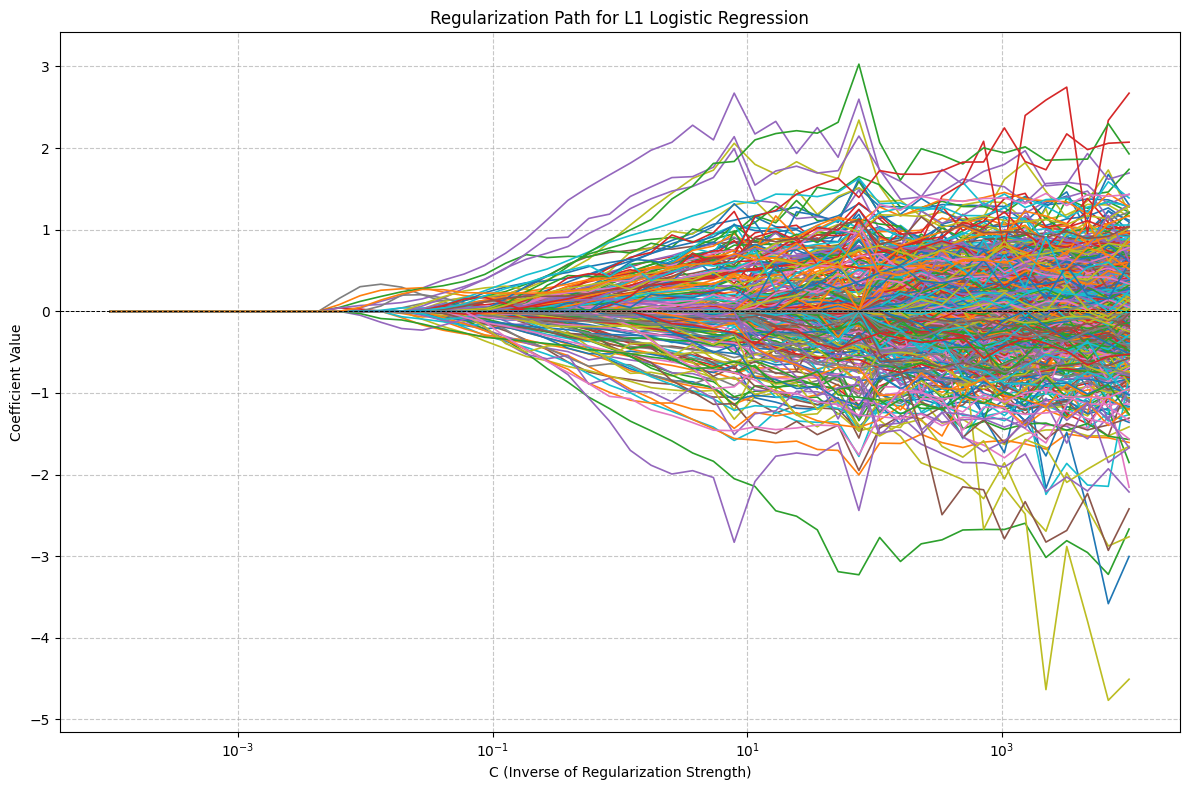

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define a range of C values (inverse of regularization strength)
C_values = np.logspace(-4, 4, 50)  # From very strong to very weak regularization
coefficients = []  # To store the coefficients for each value of C

# Loop over each value of C and fit the logistic regression model
for C in C_values:
    log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    log_reg.fit(X_train_resampled, y_train_resampled)
    coefficients.append(log_reg.coef_.ravel())  # Flatten the coefficient array

# Convert coefficients to a NumPy array for easier plotting
coefficients = np.array(coefficients)

# Plot the regularization path
plt.figure(figsize=(12, 8))
for i in range(coefficients.shape[1]):
    plt.plot(C_values, coefficients[:, i], label=f"Feature {i+1}", lw=1.2)

# Customize the plot
plt.xscale('log')  # Log scale for C values
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Coefficient Value")
plt.title("Regularization Path for L1 Logistic Regression")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Highlight zero line
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Customize legend to avoid overcrowding
if coefficients.shape[1] <= 10:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Show legend if manageable
else:
    plt.legend([],[], frameon=False)  # Suppress the legend if there are too many features

plt.show()


In [35]:
# Extract features and target variable from Newdata
X_new = Newdata.iloc[:, :-1]
y_new = Newdata.iloc[:, -1]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling the minority class

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE only to the training data
X_train_resampled_new, y_train_resampled_new = smote.fit_resample(X_train_new, y_train_new)

# Initialize StandardScaler and scale the training and test datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_new = scaler.fit_transform(X_train_resampled_new)
X_test_scaled_new = scaler.transform(X_test_new)

# Quick check to confirm the shape of the datasets after resampling and scaling
print(f"Training Set Size after Resampling: {X_train_scaled_new.shape}")
print(f"Test Set Size: {X_test_scaled_new.shape}")


Training Set Size after Resampling: (900, 251)
Test Set Size: (152, 251)


### Variable selection with xgboost

In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 2: Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=47
)

# Step 3: Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1,  # Use all available processors
    verbose=1  # To show progress during parameter tuning
)

# Step 4: Fit GridSearchCV to the training data
grid_search.fit(X_train_f, y_train_f)

# Step 5: Extract the best parameters and the best model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 6: Train the XGBoost model using the best parameters
best_xgb = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=47, 
    **best_params
)

best_xgb.fit(X_train_f, y_train_f)

# Step 7: Make predictions on the test set
y_pred = best_xgb.predict(X_test_f)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test_f, y_pred)
conf_matrix = confusion_matrix(y_test_f, y_pred)
class_report = classification_report(y_test_f, y_pred)

# Step 9: Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Docum

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}


[19:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Accuracy: 0.9013

Confusion Matrix:
[[ 24  14]
 [  1 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        38
           1       0.89      0.99      0.94       114

    accuracy                           0.90       152
   macro avg       0.92      0.81      0.85       152
weighted avg       0.91      0.90      0.89       152



### Reduced Model : Logistic Regression 

In [37]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# Initialize the logistic regression model with L1 regularization
log_reg = LogisticRegression(max_iter=5000, random_state=47)

# Fit the model to the resampled training data
log_reg.fit(X_train_scaled_new, y_train_resampled_new)

# Make predictions on the test set
y_pred_new = log_reg.predict(X_test_scaled_new)

# Evaluate model performance
accuracy = accuracy_score(y_test_new, y_pred_new)
conf_matrix = confusion_matrix(y_test_new, y_pred_new)
class_report = classification_report(y_test_new, y_pred_new)
mse = mean_squared_error(y_test_new, y_pred_new)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Display the number of non-zero coefficients (selected features)
num_selected_features = np.sum(log_reg.coef_ != 0)
print(f"Number of selected features: {num_selected_features}")


Accuracy: 0.8553
Mean Squared Error (MSE): 0.1447

Confusion Matrix:
[[ 24  14]
 [  8 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.88      0.93      0.91       114

    accuracy                           0.86       152
   macro avg       0.82      0.78      0.80       152
weighted avg       0.85      0.86      0.85       152

Number of selected features: 251


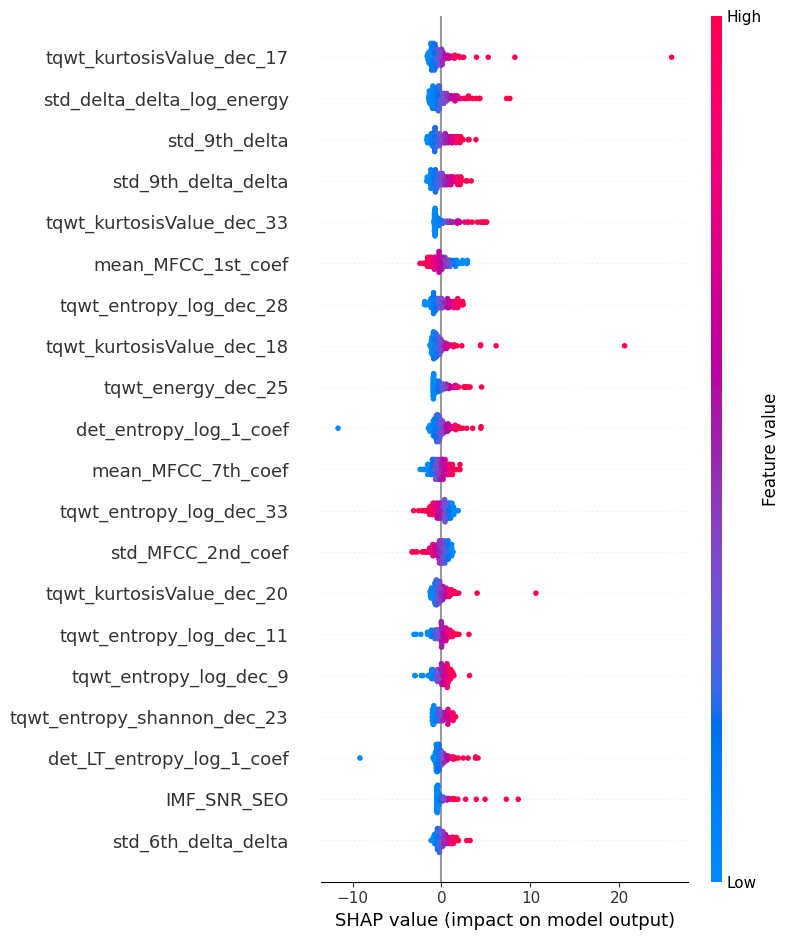

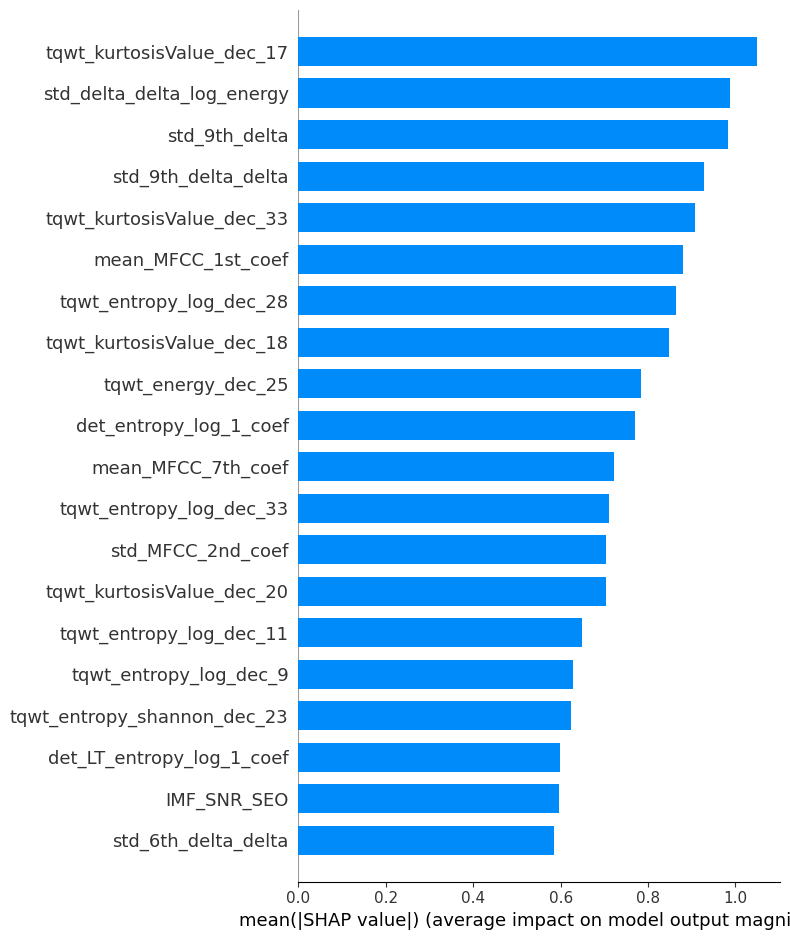

In [29]:
import shap
# Initialize the SHAP explainer (use LinearExplainer for logistic regression)
explainer = shap.LinearExplainer(log_reg, X_test_scaled_new)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled_new)

# SHAP summary plot (shows feature importance)
shap.summary_plot(shap_values, X_test_scaled_new, feature_names=X_new.columns)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled_new, feature_names=X_new.columns, plot_type="bar")



### KNN

In [30]:
# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': range(1, 31),  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1,  # Use all available processors
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled_new, y_train_resampled_new)

# Get the best parameters and best model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled_new, y_train_resampled_new)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled_new)

# Evaluate the model
accuracy = accuracy_score(y_test_new, y_pred)
conf_matrix = confusion_matrix(y_test_new, y_pred)
class_report = classification_report(y_test_new, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.9342

Confusion Matrix:
[[ 38   4]
 [  6 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.96      0.95      0.95       110

    accuracy                           0.93       152
   macro avg       0.91      0.93      0.92       152
weighted avg       0.94      0.93      0.93       152



### Gaussian Naive Bayes

In [39]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define a parameter grid for GaussianNB
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)  # Values from very small (10^-9) to larger (10^0)
}

# Use GridSearchCV to find the best `var_smoothing` value
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled_new, y_train_resampled_new)

# Get the best model and parameters
best_gnb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the best parameters and score from the grid search
print(f"Best Parameters for GaussianNB: {best_params}")
print(f"Best Cross-Validated Score: {best_score:.4f}")

# Make predictions using the best model
y_pred_new = best_gnb_model.predict(X_test_scaled_new)

# Evaluate model performance
accuracy = accuracy_score(y_test_new, y_pred_new)
conf_matrix = confusion_matrix(y_test_new, y_pred_new)
class_report = classification_report(y_test_new, y_pred_new)

# Display evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Best Parameters for GaussianNB: {'var_smoothing': 0.09999999999999999}
Best Cross-Validated Score: 0.8133
Accuracy: 0.6776

Confusion Matrix:
[[28 18]
 [31 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        46
           1       0.81      0.71      0.75       106

    accuracy                           0.68       152
   macro avg       0.64      0.66      0.64       152
weighted avg       0.71      0.68      0.69       152



### Xgboost Using Reduced Model

In [38]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 2: Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=47
)

# Step 3: Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1,  # Use all available processors
    verbose=1  # To show progress during parameter tuning
)

# Step 4: Fit GridSearchCV to the training data
grid_search.fit(X_train_new, y_train_new)

# Step 5: Extract the best parameters and the best model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 6: Train the XGBoost model using the best parameters
best_xgb_red = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=47, 
    **best_params
)

best_xgb_red.fit(X_train_new, y_train_new)

# Step 7: Make predictions on the test set
y_pred = best_xgb_red.predict(X_test_new)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test_new, y_pred)
conf_matrix = confusion_matrix(y_test_new, y_pred)
class_report = classification_report(y_test_new, y_pred)

# Step 9: Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:34:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:34:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:34:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Documents/Final_Project/.venv/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [19:34:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/fe528610/Docum

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}


[19:36:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Accuracy: 0.8816

Confusion Matrix:
[[ 24  14]
 [  4 110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.89      0.96      0.92       114

    accuracy                           0.88       152
   macro avg       0.87      0.80      0.83       152
weighted avg       0.88      0.88      0.88       152



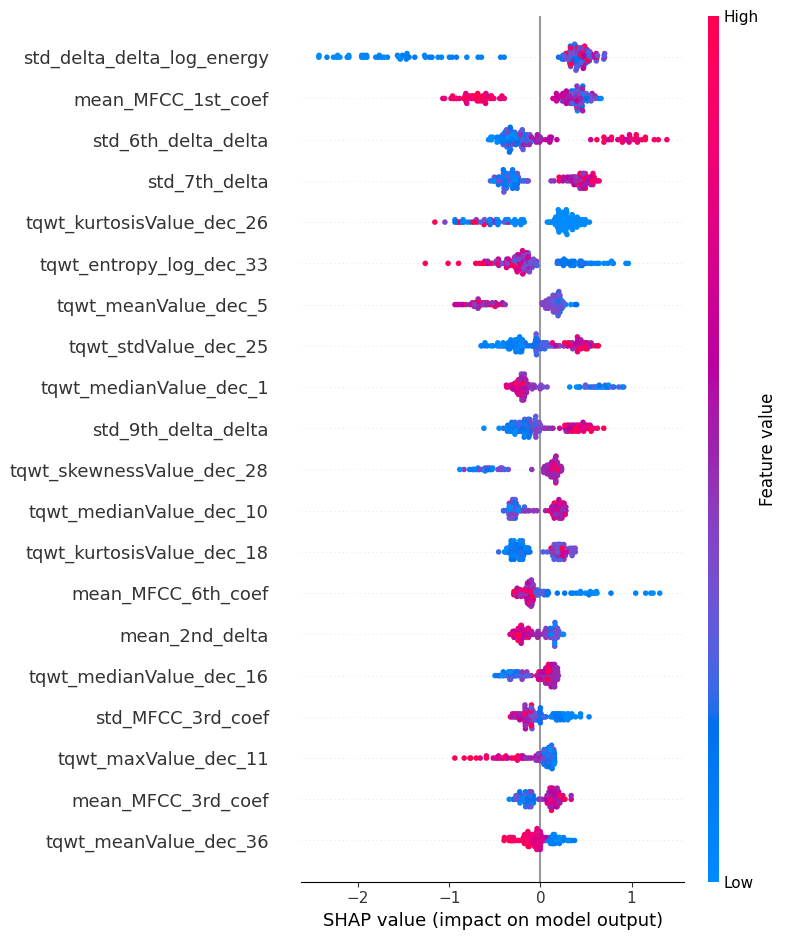

In [32]:
# Import necessary libraries
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Make sure SHAP is installed. If not, you can install it using:
# !pip install shap

# Initialize the explainer for the XGBoost model
explainer = shap.Explainer(best_xgb_red, X_train_new)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_new)

# Plot summary plot to visualize feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_new, feature_names=X_new.columns)


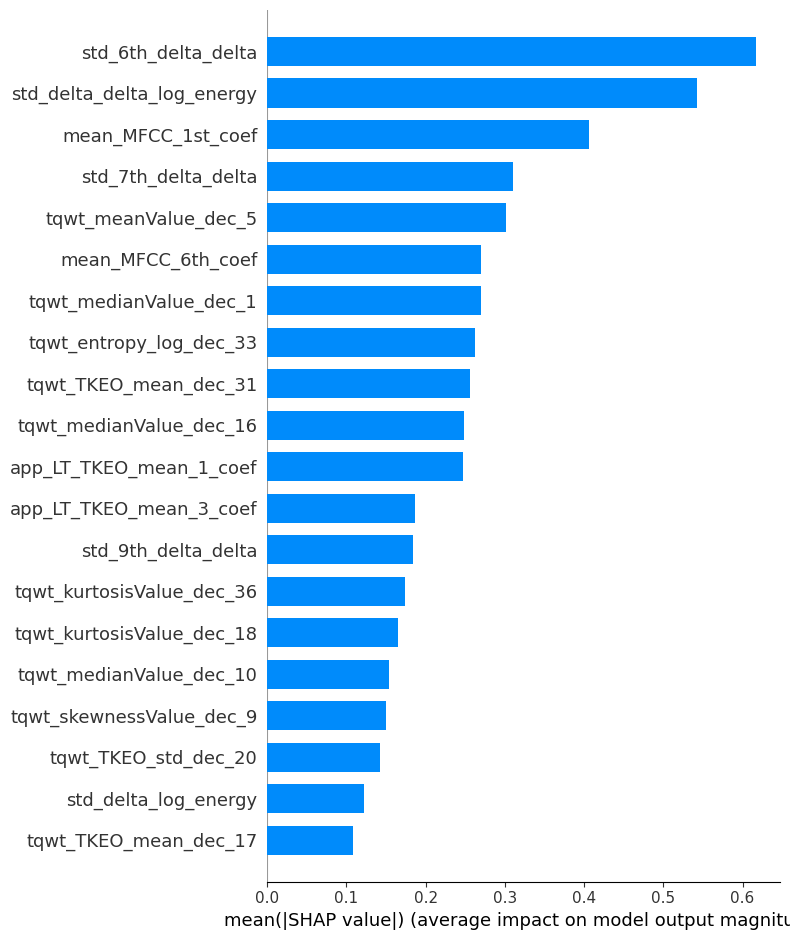

In [75]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_new, feature_names=X_new.columns, plot_type="bar")


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test_scaled_new[0], feature_names=X_new.columns)


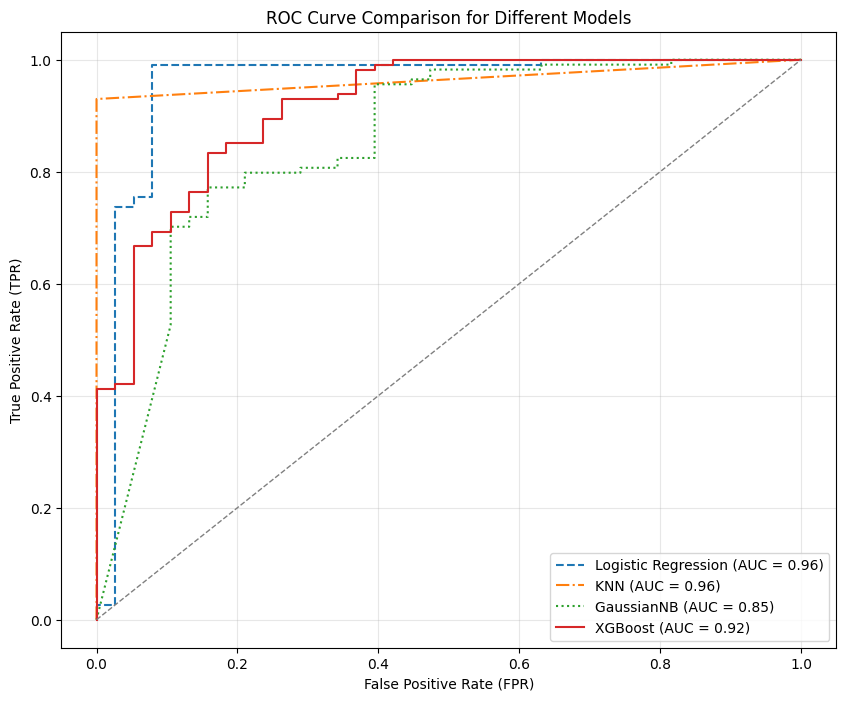

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression - Calculate probabilities and ROC values
y_prob_log_reg = log_reg.predict_proba(X_test_scaled_new)[:, 1]  # Get probabilities for the positive class
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_new, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test_new, y_prob_log_reg)

# K-Nearest Neighbors - Calculate probabilities and ROC values
y_prob_knn = best_knn.predict_proba(X_test_scaled_new)[:, 1]  # Get probabilities for the positive class
fpr_knn, tpr_knn, _ = roc_curve(y_test_new, y_prob_knn)
auc_knn = roc_auc_score(y_test_new, y_prob_knn)

# Gaussian Naive Bayes - Calculate probabilities and ROC values
y_prob_gnb = best_gnb_model.predict_proba(X_test_scaled_new)[:, 1]  # Get probabilities for the positive class
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_new, y_prob_gnb)
auc_gnb = roc_auc_score(y_test_new, y_prob_gnb)

# XGBoost - Calculate probabilities and ROC values
y_prob_xgb = best_xgb_red.predict_proba(X_test_new)[:, 1]  # Get probabilities for the positive class
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_new, y_prob_xgb)
auc_xgb = roc_auc_score(y_test_new, y_prob_xgb)

# Plotting all ROC curves on the same graph
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})', linestyle='--')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', linestyle='-.')
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {auc_gnb:.2f})', linestyle=':')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linestyle='-')

# Plot reference line (random classifier)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Customize plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison for Different Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
